In [47]:
# все библиотеки

import matplotlib.pyplot as plt
import math
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



```
Даны точки А, В, С своими координатами, найти уравнение прямой проходящей
через точку С и перпендикулярную прямой АВ.
```



In [73]:
def find_perpendicular_line_equation(A, B, C):
    # Вычисляем координаты вектора AB
    AB_vector = (B[0] - A[0], B[1] - A[1])

    # Находим координаты вектора, перпендикулярного AB
    perpendicular_vector = (-AB_vector[1], AB_vector[0])

    # Уравнение прямой имеет вид y = mx + b
    # Где m - угловой коэффициент, равный отношению y-компоненты вектора к x-компоненте
    # Проверка на вертикальную линию (деление на 0)
    if perpendicular_vector[0] == 0:
      # Вертикальная линия, возвращаем специальное значение
      return None
    else:
      m = perpendicular_vector[1] / perpendicular_vector[0]

    # Теперь найдем b, подставив координаты точки C в уравнение
    b = C[1] - m * C[0]

    return m, b



def plot_perpendicular_line(A, B, C):
    line_equation = find_perpendicular_line_equation(A, B, C)

    if line_equation is None:
        return

    m, b = line_equation

    plt.plot([A[0], B[0]], [A[1], B[1]], label='AB')
    plt.plot([C[0], C[0] + 1], [C[1], m * (C[0] + 1) + b], linestyle='--', label='Перпендикуляр')

    plt.scatter([A[0], B[0], C[0]], [A[1], B[1], C[1]], color='red')

    plt.text(A[0], A[1], 'A', ha='right')
    plt.text(B[0], B[1], 'B', ha='right')
    plt.text(C[0], C[1], 'C', ha='right')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid()
    plt.show()

Уравнение прямой: y = -0.0 * x + -1.0


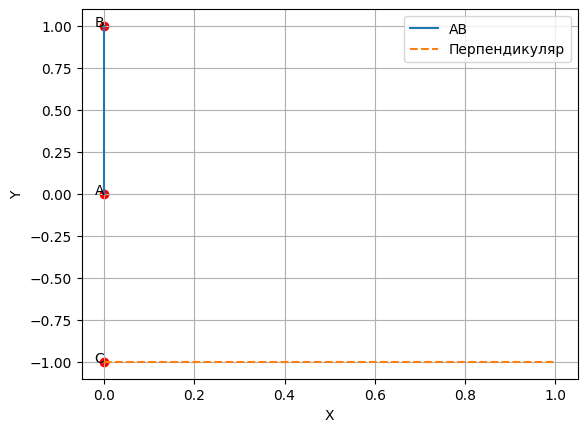

In [79]:
A = (0, 0)
B = (0, 1)
C = (0, -1)

try:
    result = find_perpendicular_line_equation(A, B, C)

    if result is None:
        print(":(")
    else:
        m, b = result
        print("Уравнение прямой:", f'y = {m} * x + {b}')

    plot_perpendicular_line(A, B, C)

except Exception as e:
    print("Произошла ошибка:", e)

Даны три точки А,В,С, лежащие на одной прямой. Определить какая из них лежит
между двумя другими.

In [34]:
def find_middle_point(A, B, C):
    x1, y1 = A
    x2, y2 = B
    points = [A, B, C]

    # Находим угловой коэффициент
    m = (y2 - y1) / (x2 - x1) if x2 != x1 else float('inf')

    if m > 0:
      sorted_points = sorted(points, key=lambda point: (point[0], point[1]))
      middle_index = len(sorted_points) // 2
      middle_point = sorted_points[middle_index]
    elif m < 0:
      sorted_points = sorted(points, key=lambda point: point[1])
      middle_index = len(sorted_points) // 2
      middle_point = sorted_points[middle_index]
    else:
      sorted_points = sorted(points, key=lambda point: point[1])
      middle_index = len(sorted_points) // 2
      middle_point = sorted_points[middle_index]

    return middle_point

def plot_points(A, B, C, middle_point):
    plt.scatter(*zip(A, B, C), color='blue')  # Рисуем точки A, B, C
    plt.scatter(*zip(middle_point), color='red')  # Рисуем точку, лежащую между двумя другими
    plt.plot(*zip(A, B, C, A), color='gray')  # Соединяем точки прямой

    plt.title('Взаимное расположение точек')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

точка посередине с координатами:  (1, 1)


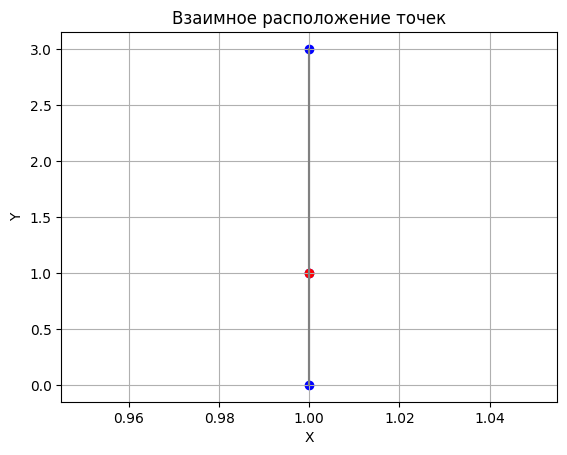

In [36]:
A = (1, 0)
B = (1, 1)
C = (1, 3)

middle_point = find_middle_point(A, B, C)
print("точка посередине с координатами: ", middle_point)
plot_points(A, B, C, middle_point)

Даны 4 точки A, B, C, D. Перпендикулярны ли прямые АВ и CD?

In [89]:
def are_lines_perpendicular(a, b, c, d):
    eps = 0.000001

    # Вычисляем векторы ab, cd, ac
    ab = (b[0] - a[0], b[1] - a[1], b[2] - a[2])
    cd = (d[0] - c[0], d[1] - c[1], d[2] - c[2])
    ac = (c[0] - a[0], c[1] - a[1], c[2] - a[2])

    # Скалярное произведение векторов ab и cd
    dot = ab[0] * cd[0] + ab[1] * cd[1] + ab[2] * cd[2]

    # Проверка на перепендикулярность
    check = ab[0] * (cd[1] * ac[2] - cd[2] * ac[1]) - ab[1] * (cd[0] * ac[2] - cd[2] * ac[0]) + ab[2] * (cd[0] * ac[1] - cd[1] * ac[0])

    if abs(dot) < eps and check == 0:
        print("Прямые AB и CD перпендикулярны.")
    else:
        print("Прямые AB и CD не перпендикулярны.")


In [92]:
A = (1, 0, 0)
B = (0, 1, 0)
C = (0, 0, 1)
D = (0, 0, 0)

result = are_lines_perpendicular(A, B, C, D)

Прямые AB и CD не перпендикулярны.


Даны точки А, В, С, D, Е своими координатами, найти уравнение плоскости
проходящей через точки D и Е и перпендикулярную плоскости АВС.

In [142]:
def get_perpend_plane_eq(a, b, c, d, e):
    eps = 0.01

    # Вычисление векторов ab и bc
    ab = (b[0] - a[0], b[1] - a[1], b[2] - a[2])
    bc = (c[0] - b[0], c[1] - b[1], c[2] - b[2])

    # Вычисление вектора нормали к плоскости abc
    cross = (ab[1] * bc[2] - ab[2] * bc[1],
             ab[2] * bc[0] - ab[0] * bc[2],
             ab[0] * bc[1] - ab[1] * bc[0])

    # Обработка случая, когда вектор нормали равен нулю
    if cross == (0, 0, 0):
        a = (a[0] + eps, a[1] + eps, a[2] + eps)

    # Обработка случая, когда точки D и E совпадают
    if d == e:
        d = (d[0] + eps, d[1] + eps, d[2] + eps)

    # Вычисление коэффициентов A, B, C, D для плоскости abc
    abc_A = (b[1] - a[1]) * (c[2] - a[2]) - (b[2] - a[2]) * (c[1] - a[1])
    abc_B = (b[2] - a[2]) * (c[0] - a[0]) - (b[0] - a[0]) * (c[2] - a[2])
    abc_C = (b[0] - a[0]) * (c[1] - a[1]) - (b[1] - a[1]) * (c[0] - a[0])
    abc_D = -1 * (abc_A * a[0] + abc_B * a[1] + abc_C * a[2])

    # Проверка еси D и E лежат в плоскости abc
    if (abc_A * d[0] + abc_B * d[1] + abc_C * d[2] + abc_D == 0 and
            abc_A * e[0] + abc_B * e[1] + abc_C * e[2] + abc_D == 0):
        d = (d[0] + eps, d[1] + eps, d[2] + eps)

    # Вычисление вектора DE
    de = (e[0] - d[0], e[1] - d[1], e[2] - d[2])

    # Вычисление коэффициентов A, B, C, D для плоскости de, перпендикулярной abc
    de_A = (e[1] - d[1]) * abc_C - (e[2] - d[2]) * abc_B
    de_B = -1 * ((e[0] - d[0]) * abc_C - (e[2] - d[2]) * abc_A)
    de_C = (e[0] - d[0]) * abc_B - (e[1] - d[1]) * abc_A
    de_D = (e[0] * d[1] - d[0] * e[1]) * abc_C + (d[0] * e[2] - e[0] * d[2]) * abc_B + (
            e[1] * d[2] - d[1] * e[2]) * abc_A

    # Вывод коэффициентов уравнения плоскости de
    print("A:", de_A)
    print("B:", de_B)
    print("C:", de_C)
    print("D:", de_D)


In [143]:
a = (0, 0, 0)
b = (1, 0, 0)
c = (0, 1, 0)
d = (0, 0, 1)
e = (0, 0, 0)

get_perpend_plane_eq(a, b, c, d, e)

A: -0.01
B: 0.01
C: 0.0
D: 0.0


Даны три точки А,В,С задающие треугольник. Определить длину медианы,
высоты и биссектрисы опущенных из точки А.

In [132]:

def form_triangle(A, B, C) -> bool:
    eps = 0.0001
    x1, y1 = A
    x2, y2 = B
    x3, y3 = C

    a = (x1 * (y2 - y3) +
         x2 * (y3 - y1) +
         x3 * (y1 - y2))
    if a < eps:
        return False
    else:
      return True


def dist(A, B):
    return math.pow((B[0] - A[0]), 2) + math.pow((B[1] - A[1]), 2)

def find_mediana(A, B, C):
    mid_BC = ((B[0] + C[0]) / 2, (B[1] + C[1]) / 2)
    return math.sqrt(dist(A, mid_BC))

def find_height(A, B, C):
    coef_a = (C[1] - B[1]) / (C[0] - B[0])
    coef_b = -1
    coef_c = -1 * (B[0] * C[1] - C[0] * B[1]) / (C[0] - B[0])

    height = abs(coef_a * A[0] + coef_b * A[1] + coef_c) / math.sqrt(math.pow(coef_a, 2) + math.pow(coef_b, 2))

    return height

def find_bisector(A, B, C):
    lambda_val = math.sqrt(dist(A, C) / dist(A, B))
    H = ((C[0] + lambda_val * B[0]) / (1 + lambda_val), (C[1] + lambda_val * B[1]) / (1 + lambda_val))

    return math.sqrt(dist(A, H))


In [133]:
A = (2, 2)
B = (2, 2)
C = (2, 2)

if form_triangle(A, B, C):
  print("Медиана: ", find_mediana(A, B, C))
  print("Биссектриса: ", find_bisector(A, B, C))
  print("Высота: ", find_height(A, B, C))
else:
  print("это не треугольник!")

это не треугольник!


In [29]:

def plot_triangle_with_properties(A, B, C):
    # Проверяем, что точки образуют треугольник
    if np.cross(np.array(B) - np.array(A), np.array(C) - np.array(A)) == 0:
        print("Точки не образуют треугольник.")
        return

    plt.plot([A[0], B[0]], [A[1], B[1]], label='AB')
    plt.plot([B[0], C[0]], [B[1], C[1]], label='BC')
    plt.plot([C[0], A[0]], [C[1], A[1]], label='CA')

    # Длина медианы
    median_length = distance(A, midpoint(B, C))
    plt.plot([A[0], midpoint(B, C)[0]], [A[1], midpoint(B, C)[1]], linestyle='--', label='Медиана')

    # Длина высоты
    height_length = distance(A, B)
    plt.plot([A[0], A[0]], [A[1], B[1]], linestyle='--', label='Высота')

    # Длина биссектрисы
    bissectrice_length = 2 * distance(A, midpoint(B, C)) * np.cos(np.radians(0.5 * np.degrees(np.arccos(distance(B, C) / (2 * distance(A, midpoint(B, C)))))))
    plt.plot([A[0], midpoint(B, C)[0]], [A[1], midpoint(B, C)[1]], linestyle='--', label='Биссектриса')

    plt.scatter([A[0], B[0], C[0], midpoint(B, C)[0]], [A[1], B[1], C[1], midpoint(B, C)[1]], color='red')

    plt.text(A[0], A[1], 'A', ha='right')
    plt.text(B[0], B[1], 'B', ha='right')
    plt.text(C[0], C[1], 'C', ha='right')
    plt.text(midpoint(B, C)[0], midpoint(B, C)[1], 'M', ha='right')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid()
    plt.show()


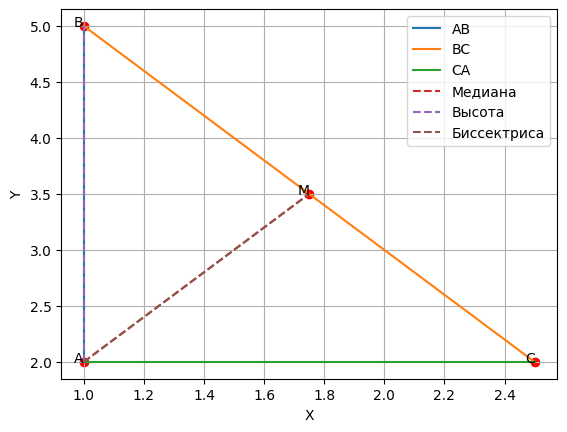

In [30]:
plot_triangle_with_properties(A, B, C)

In [ ]:



def plot_points_and_lines(A, B, C, D):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Рисуем точки A, B, C, D
    ax.scatter(*zip(A, B, C, D), color='blue')

    # Рисуем прямые AB и CD
    x_values_AB = np.linspace(A[0], B[0], 100)
    y_values_AB = np.linspace(A[1], B[1], 100)
    z_values_AB = np.linspace(A[2], B[2], 100)
    ax.plot(x_values_AB, y_values_AB, z_values_AB, label='AB', color='orange')

    x_values_CD = np.full(100, C[0])  # Вертикальная линия
    y_values_CD = np.linspace(C[1], D[1], 100)
    z_values_CD = np.linspace(C[2], D[2], 100)
    ax.plot(x_values_CD, y_values_CD, z_values_CD, label='CD', color='green')

    ax.set_title('Взаимное расположение точек и прямых')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

    plt.show()

plot_points_and_lines(A, B, C, D)


In [23]:
def find_plane_equation(A, B, C, D, E):
    # Векторы AB и AC
    AB = np.array(B) - np.array(A)
    AC = np.array(C) - np.array(A)

    # Нормаль к плоскости ABC
    N = np.cross(AB, AC)

    # Уравнение плоскости, проходящей через точку D и перпендикулярной ABC
    plane_equation = f'{N[0]} * (x - {D[0]}) + {N[1]} * (y - {D[1]}) + {N[2]} * (z - {D[2]})'

    return plane_equation

In [24]:
A = (1, 1, 1)
B = (2, 2, 2)
C = (3, 3, 3)
D = (4, 4, 4)
E = (5, 5, 5)


print(find_plane_equation(A, B, C, D, E))

0 * (x - 4) + 0 * (y - 4) + 0 * (z - 4)
